## Iris Flower Data Dictionary:
* The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
* The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).    

In [1]:
# Nessasary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the paremeters for matplotlib visual treat
plt.rcParams['axes.labelsize'] = 15.
plt.rcParams['xtick.labelsize'] = 15.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['figure.figsize'] = [15.,8.]
plt.rcParams['legend.fontsize'] = 13.

In [3]:
#Import DataSet
df = pd.read_csv("data/iris.csv")

In [4]:
df.head()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA Univariate, Bivariate and Multivariate Analysis

In [5]:
# Size of the dataset
df.size

750

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### There is no missing value in the dataset

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

### Target value is equally distributed

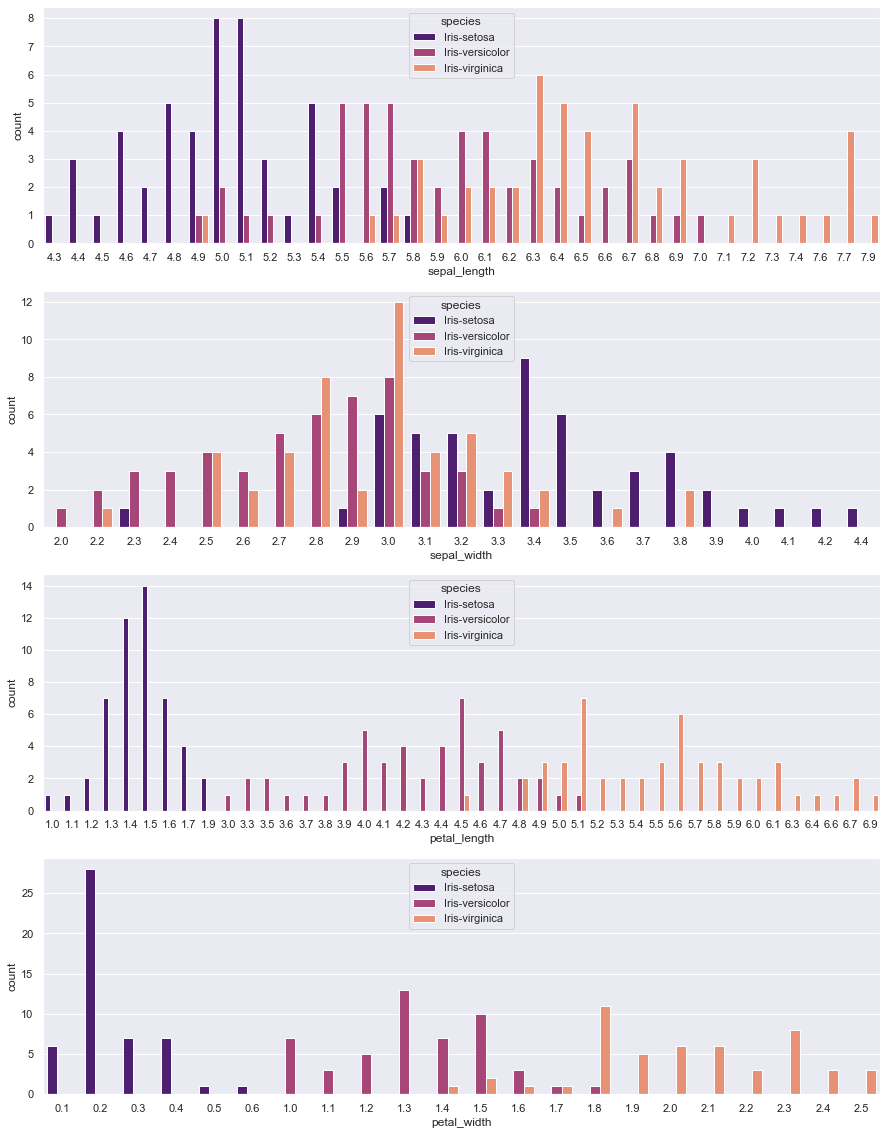

In [11]:
plt.figure(figsize=(15,20))
sns.set_theme(style='darkgrid')
plt.subplot(4,1,1)
sns.countplot(data=df, x="sepal_length", hue="species", palette="magma")
plt.subplot(4,1,2)
sns.countplot(data=df, x="sepal_width", hue="species", palette="magma")
plt.subplot(4,1,3)
sns.countplot(data=df, x="petal_length", hue="species", palette="magma")
plt.subplot(4,1,4)
sns.countplot(data=df, x="petal_width", hue="species", palette="magma");

### Comments:
* Hightest Sepal_length : `Iris_setosa`
* Hightst sepal_width   : `Iris_verginica`
* Hightest petal_length : `Iris_setosa`
* Hightest petal_width  : `Iris_setosa`

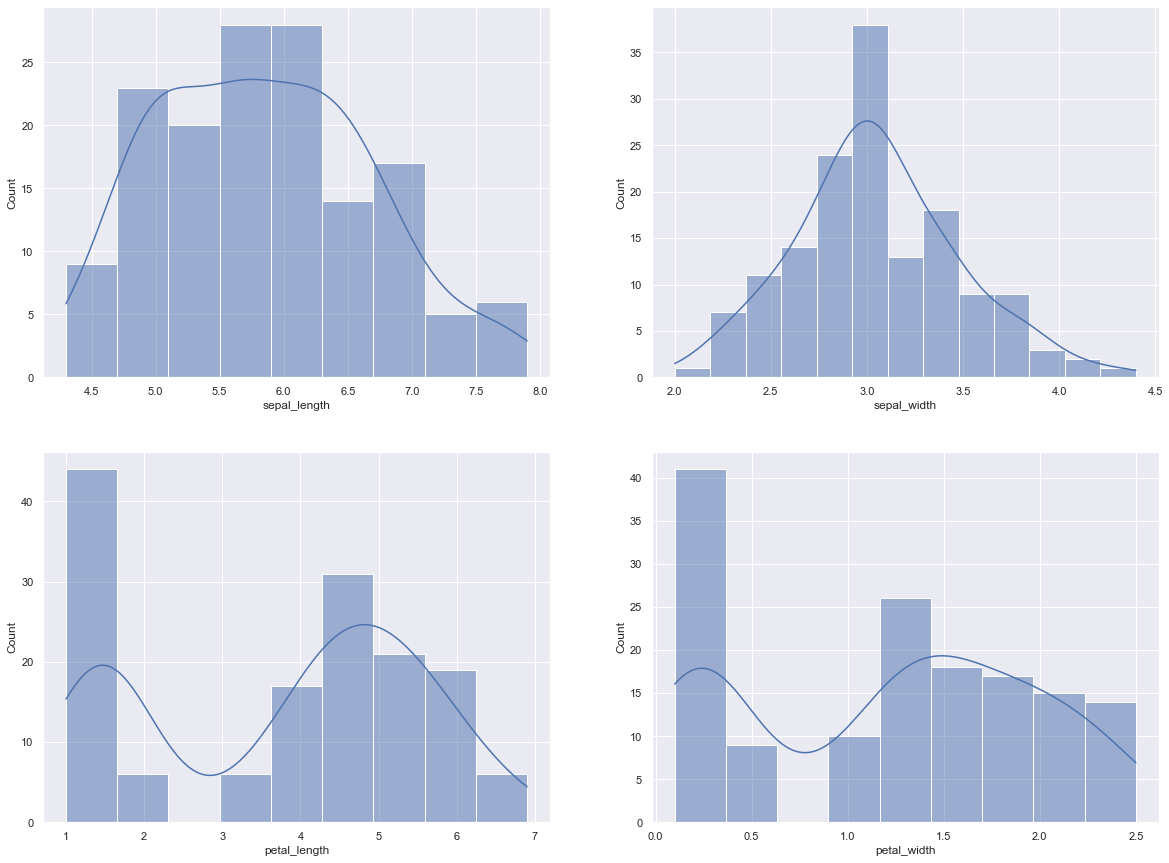

In [12]:
plt.figure(figsize=(20,15))
sns.set_theme(style='darkgrid')
plt.subplot(2,2,1)
sns.histplot(x=df['sepal_length'], kde=True)
plt.subplot(2,2,2)
sns.histplot(x=df['sepal_width'], kde=True)
plt.subplot(2,2,3)
sns.histplot(x=df['petal_length'], kde=True)
plt.subplot(2,2,4)
sns.histplot(x=df['petal_width'], kde=True);

###  >  sepal_length: The distribution is unimodal, range is between 4.5 to 8.0, the mean value is  5.843333333333334 and median value is 5.8

### > sepal_width: The distribution is unimodal, range is between 1.9 to 4.5, the mean value is  3.05 and median value is 3.0

### >  petal_length: The distribution is bimodal, range is between 1 to 7.0, the mean value is  3.75 and median value is 4.35

### >  petal_width: The distribution is bimodal, range is between 0 to 2.5, the mean value is  1.98 and median value is 1.3

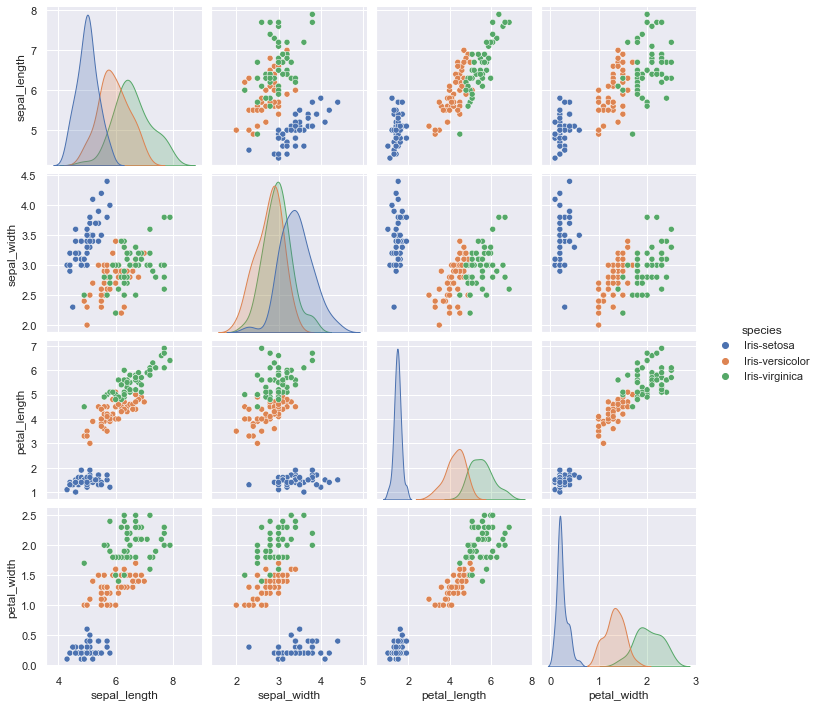

In [13]:
sns.pairplot(data=df, hue="species");

`We can observe setosa species has different characteristics,
it has highest sepal length and sepal width while its petal length and petal with is the lowest among others. As for versicolor the the sepal length/width and petal length/width is of average size compared to the other two categories where as the virgica has the high sepal length but low sepal width, also with high petal length and width.`

## Corelation between Features of Flower Categories

In [14]:
corr_matrix = df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


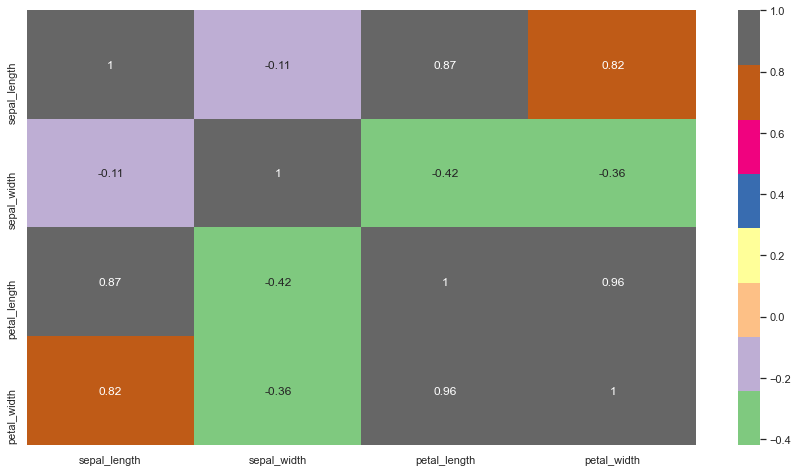

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='Accent');

### As we can see petal_length is highly corelated with the species.

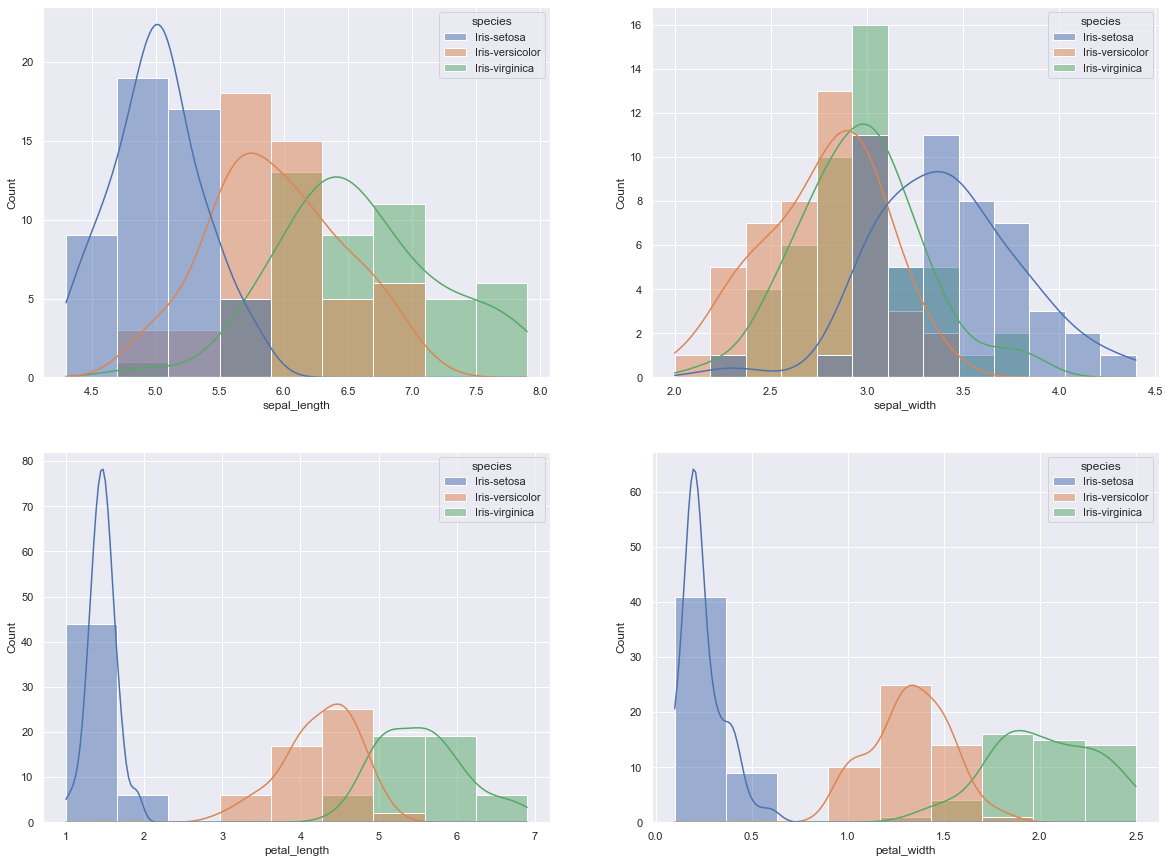

In [16]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,2,1)
sns.histplot(data=df, x='sepal_length', hue='species', kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df, x='sepal_width', hue='species', kde=True)
plt.subplot(2,2,3)
sns.histplot(data=df, x='petal_length', hue='species', kde=True)
plt.subplot(2,2,4)
sns.histplot(data=df, x='petal_width', hue='species', kde=True);

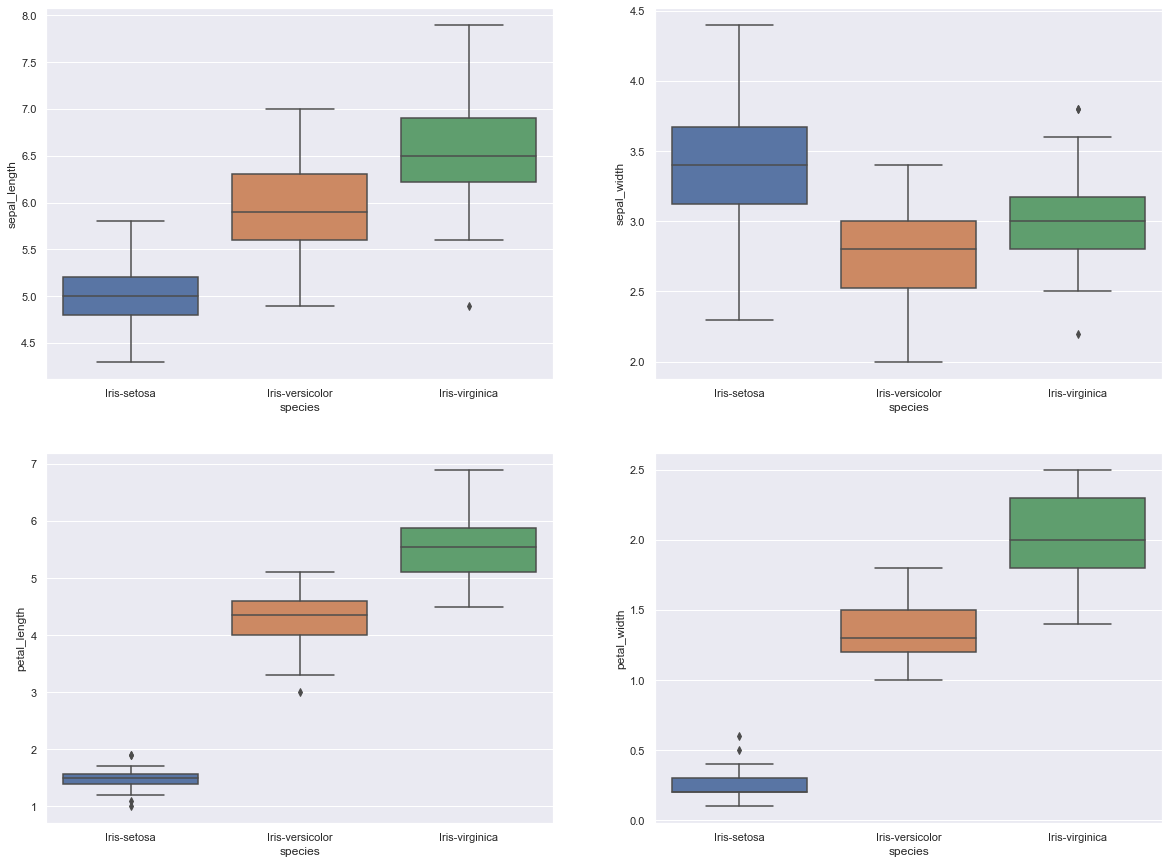

In [17]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,2,1)
sns.boxplot(data=df,x='species', y='sepal_length')
plt.subplot(2,2,2)
sns.boxplot(data=df,x='species', y='sepal_width')
plt.subplot(2,2,3)
sns.boxplot(data=df,x='species', y='petal_length')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='species', y='petal_width');

### As we can we have some outliers in virginica for sepal_length and width , sentosa and versicolor for petal_length and sentosa for  petal_width. 

## Modeling

In [18]:
x= df.drop("species",axis=1)
y = df["species"]

In [19]:
# Split into training and test set 
np.random.seed(123)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2


In [21]:
y_train.head()

114     Iris-virginica
136     Iris-virginica
53     Iris-versicolor
19         Iris-setosa
38         Iris-setosa
Name: species, dtype: object

In [22]:
# Put All models in dictionary

models = {"LogisticRegression": LogisticRegression(),
         "RandomForest Classifier": RandomForestClassifier(),
         "KNN": KNeighborsClassifier(),
         }

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    np.random.seed(123)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [23]:
scores = fit_and_score(models=models,
                      x_train=x_train,
                      x_test=x_test,
                      y_train=y_train,
                      y_test=y_test)
scores

{'LogisticRegression': 0.9333333333333333,
 'RandomForest Classifier': 0.9333333333333333,
 'KNN': 0.9777777777777777}

## Camparing Model Results (prior hyperparameter tuning)

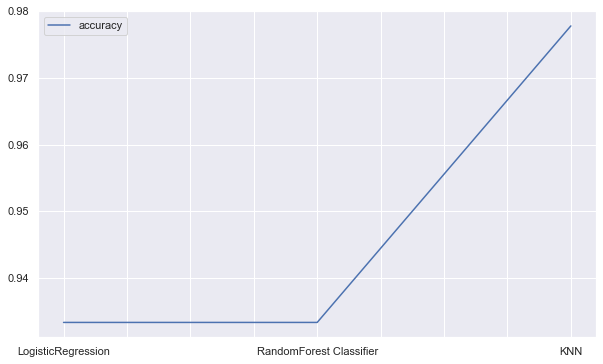

In [24]:
compare_model = pd.DataFrame(scores, index=["accuracy"])
compare_model.T.plot(kind="line", figsize=(10,6));

### KNN gives better results than both the models

## Hyerparameter Tuning

### Logistic Regression 

In [25]:
log_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100, 1000,2500, 5000]
            }]

In [26]:
np.random.seed(123)
model_log = GridSearchCV(LogisticRegression(n_jobs=-1),
                        param_grid=log_grid,
                        cv=5,
                        verbose=True)
model_log.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [27]:
model_log.best_params_

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [42]:
model_log.best_score_

0.980952380952381

## RandomForestClassifier

In [29]:
rf_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [2,4],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1,2],
            'bootstrap': [True, False]}

In [30]:
np.random.seed(123)
model_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid=rf_grid,
                       cv=5,
                       verbose=True,
                       n_jobs=-1)
model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=True)

In [31]:
model_rf.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [41]:
model_rf.best_score_

0.9523809523809523

## KNN

In [33]:
knn_grid = {"n_neighbors": [3,5,11,19],
           "weights": ["uniform", "distance"],
           "metric":["euclidean","manhattan"]}

In [38]:
np.random.seed(123)

model_knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True,
                        )
model_knn.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [43]:
model_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [44]:
model_knn.best_score_

0.980952380952381

## Conclusion:

### KNeighborsClassifier performs after hyperparameter tuning.

In [45]:
y_preds = model_knn.predict(x_test)

In [46]:
y_preds

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [49]:
confusion_matrix(y_test,y_preds)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 16]], dtype=int64)

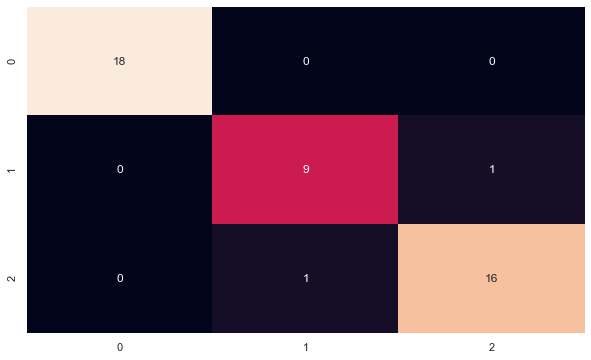

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_preds),
           annot=True, # Annotate the boxes
                     cbar=False);

In [54]:
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

